<a href="https://colab.research.google.com/github/Romilsonlonan/ecommerce/blob/main/ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

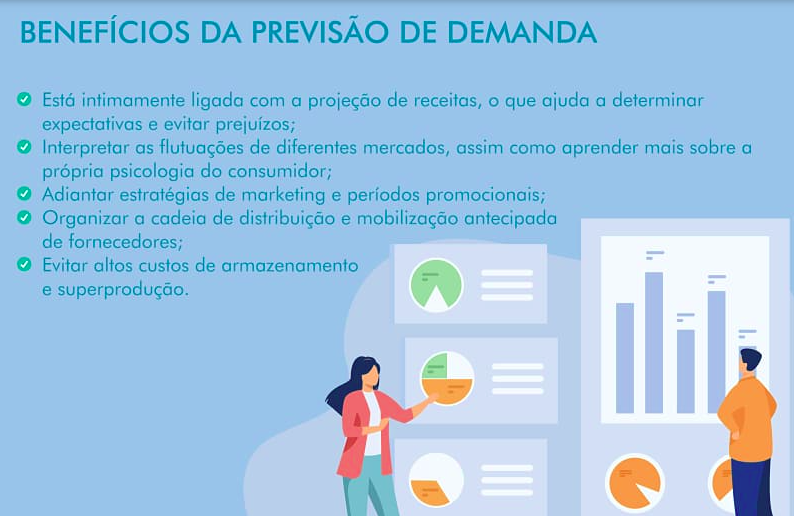

---
# Pré-Processamento de Dados
---

## Nesta etapa, estamos preparando e organizando os dados para análises posteriores, realizando tarefas como leitura dos dados, verificação da estrutura, tratamento de valores ausentes, renomeação de colunas, cálculos estatísticos iniciais, entre outras ações necessárias para tornar os dados adequados e utilizáveis para as análises ou modelagem que pretendemos realizar

In [138]:
# importando as bibliotecas

import pandas as pd # O módulo pandas é uma biblioteca de código aberto para análise de dados e aprendizado de máquina
import matplotlib.pyplot as plt # O módulo matplotlib.pyplot é uma biblioteca que fornece uma variedade de funções para criar gráficos e diagramas.
import seaborn as sns # O módulo seaborn é uma biblioteca para visualização de dados estatísticos em Python com uma variedade de funções para criar gráficos e diagramas de alta qualidade.
import plotly.express as px
import plotly.graph_objects as go

In [139]:
# Lê um arquivo Excel chamado ecommerce.xlsx e cria um DataFrame pandas chamado df com os argumentos:

# O argumento ***decimal*** especifica o separador decimal usado no arquivo Excel. No caso, o separador decimal é um ponto (.).
# O argumento ***header*** especifica a linha do arquivo Excel que contém os cabeçalhos das colunas. No caso, a linha 0 contém os cabeçalhos das colunas.
# O argumento ***index_col*** especifica a coluna que será usada como índice do DataFrame. No caso, nenhuma coluna será usada como índice
# O argumento ***na_values*** especifica os valores que serão considerados como valores ausentes no arquivo Excel. No caso, nenhum valor será considerado como valor ausente.
# O argumento ***parse_dates*** especifica as colunas que serão convertidas em datas no DataFrame. No caso, a coluna Data da Venda será convertida em uma data
df = pd.read_excel("/content/ecommerce.xlsx",
                   decimal=".",
                   header=0,
                   index_col=None,
                   na_values=False,
                   parse_dates=["Data da Venda"]
                   )

In [140]:
# O método head() é usado para retornar as 5 primeiras linhas de um DataFrame
df.head(2) # O argumento 2 especifica o número de linhas que devem ser retornadas.

Data da Venda                                  Produto  \
0  2017-06-01 00:00:00    Sistema de Som 7.1 Channel X711 Prata   
1  2017-06-01 00:00:00  180 CFM Ventilador de Coluna X450 Preto   

        Categoria  PrecoUnitario  Custo Unitário     Marca  Qtd. Vendida  \
0  Sistema de Som        1109.00          367.43  Litware            1.0   
1    Ventiladores         215.62           71.44   Litware           1.0   

        Nome Cliente                         Localidade Unnamed: 9  
0  Pinheiro, Vicente                    França - Europa        NaN  
1      Lopez, Marlon  Estados Unidos - América do Norte        NaN

In [141]:
# O método tail() é usado para retornar as últimas 5 linhas de um DataFrame.
df.tail(2) # O argumento 2 especifica o número de linhas que devem ser retornadas.

Data da Venda Produto Categoria  PrecoUnitario  Custo Unitário Marca  \
203886                   NaN       NaN            NaN             NaN   NaN   
203887                   NaN       NaN            NaN             NaN   NaN   

        Qtd. Vendida Nome Cliente Localidade Unnamed: 9  
203886           NaN          NaN        NaN        NaN  
203887           NaN          NaN        NaN        NaN

In [142]:
# O método shape() retorna a forma(tupla) de dois elementos do DataFrame df com as quantidades de linhas e colunas
df.shape

(203888, 10)

In [143]:
''' O método info() retorna informações sobre o DataFrame df. Essas informações incluem o número de linhas, o número de
colunas, os tipos de dados das colunas, os valores não nulos e a memória usada pelo DataFrame.'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203888 entries, 0 to 203887
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Data da Venda   203888 non-null  object 
 1   Produto         203882 non-null  object 
 2   Categoria       203882 non-null  object 
 3   PrecoUnitario   203882 non-null  float64
 4   Custo Unitário  203882 non-null  float64
 5   Marca           203882 non-null  object 
 6   Qtd. Vendida    203882 non-null  float64
 7   Nome Cliente    203882 non-null  object 
 8   Localidade      203882 non-null  object 
 9   Unnamed: 9      2 non-null       object 
dtypes: float64(3), object(7)
memory usage: 15.6+ MB


---
# Tratamento de dados ausentes
---

## É o processo de identificar e corrigir valores ausentes em um conjunto de dados. Os dados ausentes podem ocorrer por uma variedade de razões, como erro humano, perda de dados ou dados incompletos. O tratamento de dados ausentes é importante para garantir a integridade e a precisão de um conjunto de dados.

<Axes: >

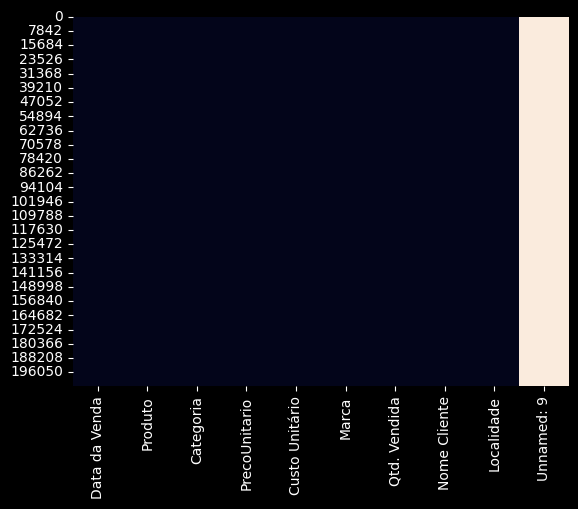

In [144]:
# Mapa de calor dos valores ausentes no DataFrame

# O método sns.heatmap() é uma função do módulo seaborn que cria um mapa de calor de uma matriz ou DataFrame.
sns.heatmap(df.isnull(), cbar=False) # O argumento cbar=False especifica que não deve haver barra de cores no mapa de calor

In [145]:
# retorna um Series com o número de valores ausentes em cada coluna do DataFrame df.
df.isnull().sum()

Data da Venda          0
Produto                6
Categoria              6
PrecoUnitario          6
Custo Unitário         6
Marca                  6
Qtd. Vendida           6
Nome Cliente           6
Localidade             6
Unnamed: 9        203886
dtype: int64

In [146]:
'''O método ***isnull()*** é um método da classe DataFrame do Pandas que retorna um DataFrame com valores booleanos,
onde True representa um valor ausente e False representa um valor não ausente.'''

enulo = df.isnull()
enulo.head(2)

Data da Venda  Produto  Categoria  PrecoUnitario  Custo Unitário  Marca  \
0          False    False      False          False           False  False   
1          False    False      False          False           False  False   

   Qtd. Vendida  Nome Cliente  Localidade  Unnamed: 9  
0         False         False       False        True  
1         False         False       False        True

In [147]:
''' Realizando um ***for*** loop com a palavra chave ***in*** que itera sobre cada coluna do DataFrame df e calcula o percentual
de dados faltantes na coluna

-> A variável coluna é inicializada com a primeira coluna do DataFrame df.
-> O método isnull() é usado para retornar um DataFrame com valores booleanos, onde True representa um valor ausente e False representa um valor não ausente.
-> O método sum() é usado para retornar o número de valores ausentes na coluna.
-> O método len() é usado para retornar o número de linhas na coluna.
-> O resultado dos métodos sum() e len() é dividido por 100 para obter o percentual de dados faltantes na coluna.

'''

for coluna in df.columns:
    faltantes_percentual = (df[coluna].isnull().sum() / len(df[coluna])) * 100
    print(f"Percentual de dados faltantes na coluna {coluna}: {round(faltantes_percentual, 3)}%")

Percentual de dados faltantes na coluna Data da Venda: 0.0%
Percentual de dados faltantes na coluna Produto: 0.003%
Percentual de dados faltantes na coluna Categoria: 0.003%
Percentual de dados faltantes na coluna PrecoUnitario: 0.003%
Percentual de dados faltantes na coluna Custo Unitário: 0.003%
Percentual de dados faltantes na coluna Marca: 0.003%
Percentual de dados faltantes na coluna Qtd. Vendida: 0.003%
Percentual de dados faltantes na coluna Nome Cliente: 0.003%
Percentual de dados faltantes na coluna Localidade: 0.003%
Percentual de dados faltantes na coluna Unnamed: 9: 99.999%


In [148]:
# o método fillna() para preencher os valores ausentes
# O method ffill é um método que preenche os valores ausentes com o valor anterior na coluna considerando a visinhança dos dados
df.fillna(method="ffill", inplace=True)

# Verificando o status de dados faltantes em cada coluna
missing_data = df.isnull().sum()

# Exibindo o status de dados faltantes por coluna
print("Status de Dados Faltantes por Coluna:")
print(missing_data)

Status de Dados Faltantes por Coluna:
Data da Venda          0
Produto                0
Categoria              0
PrecoUnitario          0
Custo Unitário         0
Marca                  0
Qtd. Vendida           0
Nome Cliente           0
Localidade             0
Unnamed: 9        175232
dtype: int64


---
## Observação: 👁️👁️
---

A coluna Unnamed: 9 não teve seus dados ausentes preenchidos com o método fillna() porque o método fillna() só preenche valores ausentes com o valor anterior na coluna. A coluna Unnamed: 9 não tem um valor anterior para preencher os valores ausentes.

Para preencher os valores ausentes na coluna Unnamed: 9, você pode usar o método fillna() com um valor diferente. Por exemplo, você pode usar o seguinte código para preencher os valores ausentes com o valor 0:

df.fillna(0, inplace=True)

Como a coluna Unnamed: 9 não é essencial para o conjunto de dados, ela pode ser removida.

---
# Manipulação de colunas
---

### ➡️ Visualizando

In [149]:
# Visualizando as colunas no meu DataFrame
df.columns

Index(['Data da Venda', 'Produto', 'Categoria', 'PrecoUnitario',
       'Custo Unitário', 'Marca', 'Qtd. Vendida', 'Nome Cliente', 'Localidade',
       'Unnamed: 9'],
      dtype='object')


### ➡️ Renomeando


O método ***rename()*** é um método da classe DataFrame do Pandas que permite renomear as colunas de um DataFrame.
O método rename() tem dois argumentos: um argumento **columns** e um argumento **inplace**. O argumento columns é um
dicionário que mapeia os nomes antigos das colunas para os nomes novos. O argumento **inplace** é um booleano que
especifica se o DataFrame original deve ser substituído ou se um novo DataFrame deve ser retornado.

In [150]:
df.rename(columns={'Data da Venda' : 'Data_Vendas' ,'PrecoUnitario' : 'Preco_Unitario', 'Custo Unitário':'Custo_Unitario', 'Qtd. Vendida' : 'Qtd_Vendida',
                   'Nome Cliente' : 'Nome_Cliente'}, inplace=True)

### ➡️ Ajustando valores

Convertendo os valores na coluna Qtd_Vendida do DataFrame df para o tipo inteiro. Isso é feito usando o método ***astype(),***
que tem um argumento que especifica o tipo para o qual os valores serão convertidos. No caso, o tipo é int, que significa inteiro.

In [151]:
df['Qtd_Vendida'] = df['Qtd_Vendida'].astype(int)

### ➡️ Gerando novas colunas a partir de outras colunas

A síntax do código df[['coluna_nova_a', 'coluna_nova_b']] = df['coluna_antiga'].str.split('-', expand=True) divide os valores na coluna_antiga do DataFrame df em duas colunas novas, coluna_nova_a e coluna_nova_b. Isso é feito usando o método ***str.split(),*** que tem dois argumentos: um argumento pat que especifica o padrão a ser usado para dividir os valores e um argumento expand que especifica se as colunas novas devem ser expandidas. No caso, o padrão é -, o que significa que os valores serão divididos em duas partes, separadas por um hífen. O argumento expand é True, o que significa que as colunas novas serão expandidas.

O método str.split() é uma ferramenta poderosa que pode ser usada para dividir strings em pedaços menores. Isso é útil para extrair informações de strings, como o país e o continente de uma localidade.

In [152]:
# Separando os atributos
df[['País', 'Continente']] = df['Localidade'].str.split('-', expand=True)

###➡️ Nova coluna Custo_Variavel

Formula -> df['Preco_Unitario'] - df['Custo_Unitario']

Um exemplo matemático para uma explicação ilustrada seria:

Custo_Variavel = Preco_Unitario - Custo_Unitario
onde:

Custo_Variavel é o custo variável de cada item
Preco_Unitario é o preço de venda de cada item
Custo_Unitario é o custo de produção de cada item
Então, se o preço de venda de um item for 10 e o custo de produção for 5, então o custo variável será 5.

10-5=5

In [153]:
# Criando uma nova coluna chamada 'Custo_Variavel' no DataFrame que recebera a diferença entre valores nas colunas Preco_Unitario e Custo_Unitario
df['Custo_Variavel'] = df['Preco_Unitario'] - df['Custo_Unitario']

###➡️ Nova coluna lucro

Fórmula -> (df['Preco_Unitario'] - df['Custo_Unitario']) * * df['Qtd_Vendida']

Um exemplo matemático para uma explicação ilustrada para nova coluna Lucro seria:

Lucro = (Preco_Unitario - Custo_Unitario) * Qtd_Vendida onde:

Lucro -> é o lucro de cada item Preco_Unitario -> é o preço de venda de cada item Custo_Unitario -> é o custo de produção de cada item Qtd_Vendida -> é a quantidade vendida de cada item Então, se o preço de venda de um item for 10, o custo de produção for 5 e a quantidade vendida for 2, então o lucro será 10.

(10-5)*2=10

In [154]:
df['Lucro'] = (df['Preco_Unitario'] - df['Custo_Unitario']) * df['Qtd_Vendida']

###➡️ Nova coluna Total_Vendas

Formula -> (df['Preco_Unitario'] - df['Custo_Unitario']) * df['Qtd_Vendida']

Um exemplo matemático para uma explicação ilustrada seria:

Total_Vendas = Preco_Unitario * Qtd_Vendida
onde:

Total_Vendas é o total de vendas de cada item
Preco_Unitario é o preço de venda de cada item
Qtd_Vendida é a quantidade vendida de cada item
Então, se o preço de venda de um item for 10 e a quantidade vendida for 2, então o total de vendas será 20.

10*2=20



In [155]:
# loc é um método do Pandas DataFrame que é usado para acessar ou modificar as linhas e colunas por meio de rótulos.

df.loc[:, 'Total_Vendas'] = df['Preco_Unitario'] * df['Qtd_Vendida']

###➡️ Nova coluna Lucro_Total_País

A representação matemática do código df['Lucro_Total_País'] = df.groupby('País')['Lucro'].transform('sum') é a seguinte:

Lucro_Total_País = Σ(Lucro) por País
Onde Lucro é a coluna que contém o lucro de cada país e Σ é o operador de soma.

Em outras palavras, o código calcula o lucro total de cada país somando os lucros de cada linha no grupo.

In [156]:
# Calcular o lucro total por país usando a função groupby e transform
df['Lucro_Total_País'] = df.groupby('País')['Lucro'].transform('sum')

### ➡️ Nova coluna Lucro_Liquido_Total_País

A representação matemática do código df['Lucro_Liquido_Total_País'] = df.groupby('País')['Lucro'].transform('sum') - df.groupby('País')['Custo_Unitario'].transform('sum') é a seguinte:

Lucro_Liquido_Total_País = Σ(Lucro) por País - Σ(Custo_Unitario) por País

Onde Lucro e Custo_Unitário são as colunas que contêm o lucro e o custo unitário de cada país, respectivamente, e Σ é o operador de soma.

Em outras palavras, o código calcula o lucro líquido total de cada país subtraindo o custo unitário do lucro de cada linha no grupo.

Por exemplo, se o DataFrame df tiver as seguintes linhas:

País | Lucro | Custo_Unitário
------- | -------- | --------
Brasil | 100 | 50
Estados Unidos | 200 | 100
Canadá | 300 | 150


In [157]:
df['Lucro_Liquido_Total_País'] = df.groupby('País')['Lucro'].transform('sum') - df.groupby('País')['Custo_Unitario'].transform('sum')

###➡️ Nova coluna Receitas

A representação matemática para a coluna df['Receitas'] = df['Preco_Unitario'] * df['Qtd_Vendida'] é a seguinte:

Receitas = Preço unitário * Quantidade vendida
Onde Preço unitário é a coluna que contém o preço unitário de cada produto e Quantidade vendida é a coluna que contém a quantidade vendida de cada produto.

Em outras palavras, o código calcula as receitas de cada produto multiplicando o preço unitário pela quantidade vendida.

Por exemplo, se o DataFrame df tiver as seguintes linhas:

Produto | Preço unitário | Quantidade vendida
------- | -------- | --------
Camisa | 100 | 2
Calça | 150 | 3
Sapato | 200 | 1
O código df['Receitas'] = df['Preco_Unitario'] * df['Qtd_Vendida'] calculará as receitas de cada produto multiplicando o preço unitário pela quantidade vendida. Portanto, o código produzirá o seguinte resultado:

Produto | Receitas
------- | --------
Camisa | 200
Calça | 450
Sapato | 200
Em termos matemáticos, o código é equivalente à seguinte fórmula:

Receitas = Preço unitário * Quantidade vendida

Receitas_Camisa = 100 * 2 = 200
Receitas_Calça = 150 * 3 = 450
Receitas_Sapato = 200 * 1 = 200
Portanto, as receitas da camisa são 200, as receitas da calça são 450 e as receitas do sapato são 200.

In [158]:
df['Receitas'] = df['Preco_Unitario'] * df['Qtd_Vendida']

###➡️ Nova coluna Lucro_Bruto_Total_País

A representação matemática para a coluna Lucro_Bruto_Total_País é a seguinte:

Lucro_Bruto_Total_País = Σ(Receitas) por País - Σ(Custo_Unitário) por País
Onde Receitas e Custo_Unitário são as colunas que contêm as receitas e o custo unitário de cada país, respectivamente, e Σ é o operador de soma.

Em outras palavras, o código calcula o lucro bruto total de cada país subtraindo o custo unitário das receitas de cada linha no grupo.

Por exemplo, se o DataFrame df tiver as seguintes linhas:

País | Receitas | Custo_Unitário
------- | -------- | --------
Brasil | 100 | 50
Estados Unidos | 200 | 100
Canadá | 300 | 150
O código df['Lucro_Bruto_Total_País'] = df.groupby('País')['Receitas'].transform('sum') - df.groupby('País')['Custo_Unitário'].transform('sum') calculará o lucro bruto total de cada país subtraindo o custo unitário das receitas de cada linha no grupo. Portanto, o código produzirá o seguinte resultado:

País | Lucro_Bruto_Total_País
------- | --------
Brasil | 50
Estados Unidos | 100
Canadá | 150
Em termos matemáticos, o código é equivalente à seguinte fórmula:

Lucro_Bruto_Total_País = Σ(Receitas) por País - Σ(Custo_Unitário) por País

Lucro_Bruto_Total_Brasil = Σ(Receitas) para linhas em Brasil - Σ(Custo_Unitário) para linhas em Brasil
Lucro_Bruto_Total_Estados_Unidos = Σ(Receitas) para linhas em Estados_Unidos - Σ(Custo_Unitário) para linhas em Estados_Unidos
Lucro_Bruto_Total_Canadá = Σ(Receitas) para linhas em Canadá - Σ(Custo_Unitário) para linhas em Canadá

Lucro_Bruto_Total_Brasil = 100 - 50 = 50
Lucro_Bruto_Total_Estados_Unidos = 200 - 100 = 100
Lucro_Bruto_Total_Canadá = 300 - 150 = 150

Portanto, o lucro bruto total do Brasil é 50, o lucro bruto total dos Estados Unidos é 100 e o lucro bruto total do Canadá é 150.

In [159]:
df['Lucro_Bruto_Total_País'] = df.groupby('País')['Receitas'].transform('sum') - df.groupby('País')['Custo_Unitario'].transform('sum')

In [160]:
# Todas as compras feitas pelo respectivo cliente usando a função groupby e transform
df['Qtd_Compras'] = df.groupby('Nome_Cliente')['Qtd_Vendida'].transform('sum')

In [161]:
# Todas as compras feitas pelo respectivo País usando a função groupby e transform
df['Qtd_Compras_País'] = df.groupby('País')['Qtd_Vendida'].transform('sum')

In [162]:
# Todas as compras feitas pelo respectivo Continente usando a função groupby e transform
df['Qtd_Compras_Continente'] = df.groupby('Continente')['Qtd_Vendida'].transform('sum')

In [163]:
# Aplicando novamente o método fiina com os argumentos ffill e bfill pois os dados de datas estavão inexistentes ou estavam em NaT

df['Data_Vendas'] = pd.to_datetime(df['Data_Vendas'], errors='coerce')

# Convertendo a coluna Data_Vendas do DataFrame df em um tipo de dados datetime.
df['Data_Vendas'] = df['Data_Vendas'].fillna(method='ffill').fillna(method='bfill')



# Os métodos dt.day, dt.month e dt.year retornam o dia, o mês e o ano de um objeto datetime
df['Dia'] = df['Data_Vendas'].dt.day
df['Mes'] = df['Data_Vendas'].dt.month
df['Ano'] = df['Data_Vendas'].dt.year

---
###➡️ Criando uma nova coluna para segmentar clientes
---

A classificação de clientes é uma forma de categorizar os clientes com base em seu valor para o negócio. Os clientes podem ser classificados com base em uma variedade de fatores, como valor gasto, frequência de compra e probabilidade de retenção. A classificação de clientes pode ser usada para melhorar o atendimento ao cliente, direcionar campanhas de marketing e tomar decisões de negócios.

No caso do e-commerce, a classificação de clientes pode ser usada para:

* Identificar clientes VIP e oferecer-lhes descontos e benefícios exclusivos.

* Segmentar clientes para campanhas de marketing personalizadas.

* Priorizar o atendimento ao cliente para clientes importantes.

* Tomar decisões de estoque e preços com base no comportamento de compra dos clientes.
A classificação de clientes é uma ferramenta poderosa que pode ser usada para melhorar o desempenho do negócio. Usando machine learning, as empresas podem classificar os clientes com precisão e eficiência. Isso pode levar a um aumento nas vendas, melhor atendimento ao cliente, redução dos custos e melhor tomada de decisão.

Podemos usar a classificação de clientes para estimar o futuro comportamento de compra dos clientes. Isso pode ser feito analisando o histórico de compras dos clientes, seus dados demográficos e seus interesses. Ao identificar padrões no comportamento de compra dos clientes, você pode prever quais produtos e serviços eles estão mais propensos a comprar no futuro. Essa informação pode ser usada para direcionar campanhas de marketing personalizadas, desenvolver novos produtos e serviços e melhorar o atendimento ao cliente.

---
###➡️ Classificação de clientes em duas categorias: ouro e prata.
---

In [172]:
# Definir os limites das classificações
limites = [1, 100, 20000]

# Definir os rótulos das classificações conforme quantidade de compras
rotulos = ['Cliente_Ouro', 'Cliente_Prata']

# Criar uma nova coluna 'Categoria_Compra' e 'Racking_Cliente' com base nos valores da coluna 'Qtd_Compras'
df['Classificacao_Cliente'] = pd.cut(df['Total_Vendas'], bins=limites, labels=rotulos, right=False)

In [173]:
#Os clientes com vendas totais superiores a 1001,00 são classificados como clientes ouro.
df.loc[df['Total_Vendas'] >= 1001.00, 'Classificacao_Cliente'] = 'Cliente_Ouro'

#os clientes com vendas totais inferiores ou iguais a 1000,00 são classificados como clientes prata
df.loc[df['Total_Vendas'] <= 1000.00, 'Classificacao_Cliente'] = 'Cliente_Prata'

# Exibir os dados com os rótulos de classificação
dados_com_rotulos_str = df[['Nome_Cliente', 'Qtd_Compras', 'Qtd_Vendida', 'Preco_Unitario', 'Classificacao_Cliente', 'Total_Vendas']]
dados_com_rotulos_str.head(5)


Nome_Cliente  Qtd_Compras  Qtd_Vendida  Preco_Unitario  \
0  Pinheiro, Vicente            1            1         1109.00   
1      Lopez, Marlon            1            1          215.62   
2   Gonzalez, Martin           42            1          215.62   
3       Ruiz, Victor           21            1          215.62   
4       Nelson, Alex           32            5          215.62   

  Classificacao_Cliente  Total_Vendas  
0          Cliente_Ouro       1109.00  
1         Cliente_Prata        215.62  
2         Cliente_Prata        215.62  
3         Cliente_Prata        215.62  
4          Cliente_Ouro       1078.10

In [165]:
# Exibir os dados com os rótulos de categoria
dados_com_rotulos_str = df[['Nome_Cliente', 'Qtd_Compras', 'Qtd_Vendida', 'Preco_Unitario', 'Classificacao_Cliente', 'Total_Vendas']]

# Plotar o gráfico de barras interativo com fundo escuro
fig = px.bar(dados_com_rotulos_str, x='Classificacao_Cliente', y='Total_Vendas', color='Classificacao_Cliente')
fig.update_layout(
    plot_bgcolor='rgb(17,17,17)',  # Cor de fundo do gráfico
    paper_bgcolor='rgb(17,17,17)',  # Cor de fundo do papel
    font_color='white'  # Cor do texto
)
fig.show()

In [166]:
# Filtrar os dados para incluir somente os clientes com os rótulos desejados
clientes = df[df['Classificacao_Cliente'].isin(['Cliente_Ouro', 'Cliente_Prata'])]

# Criar as figuras do gráfico
fig = go.Figure()

# Adicionar as séries de dados ao gráfico
for categoria in clientes['Classificacao_Cliente'].unique():
    categoria_data = clientes[clientes['Classificacao_Cliente'] == categoria]
    fig.add_trace(go.Scatterpolar(
        r=categoria_data['Total_Vendas'],
 #       theta=categoria_data['Qtd_Vendida'],
        name=categoria,
        fill='toself'
    ))

# Configurar o layout do gráfico
fig.update_layout(
    title='Total de Vendas por Cliente',
    polar=dict(
        radialaxis=dict(
            visible=True
        )
    ),
    showlegend=True,
    template='plotly_dark'
)

# Exibir o gráfico
fig.show()

### Removendo colunas



drop é um método que remove linhas ou colunas de um DataFrame. O parâmetro axis especifica o eixo ao longo do qual as linhas ou colunas devem ser removidas. O eixo 0 em um DataFrame é o eixo das linhas, enquanto o eixo 1 é o eixo das colunas. O parâmetro inplace especifica se a alteração deve ser feita no próprio DataFrame ou em uma cópia.

In [167]:
# Removendo a coluna Unnamed: 9, pois não agraga ao conjunto de dados.

df.drop('Unnamed: 9', axis = 1, inplace=True)

##➡️ Reorganizando colunas

In [168]:
df = df[[
         'Data_Vendas',
         'Nome_Cliente',
         'Qtd_Compras',
         'Classificacao_Cliente',
         'Categoria',
         'Marca',
         'Produto',
         'Preco_Unitario',
         'Custo_Unitario',
         'Custo_Variavel',
         'Qtd_Vendida',
         'Total_Vendas',
         'Lucro',
         'País',
         'Continente',
         'Receitas',
         'Lucro_Total_País',
         'Lucro_Liquido_Total_País',
         'Lucro_Bruto_Total_País',
         'Qtd_Compras_País',
         'Qtd_Compras_Continente',
         'Dia',
         'Mes',
         'Ano'
         ]]

---
#➡️ Ajustando a posição do nome com o sobrenome
---

A função lambda é que inverte os nomes em um DataFrame. A função lambda é definida como inverter_nomes = lambda nome: ' '.join(nome.split(',')[::-1]) if isinstance(nome, str) else nome. A função primeiro verifica se o nome é uma string. Se for, ele inverte os nomes usando o método split() para dividir o nome em uma lista e o método join() para combinar os nomes novamente, mas na ordem inversa. Se o nome não for uma string, ele é retornado como está.

A função lambda é então usada para inverter os nomes na coluna Nome_Cliente no DataFrame usando o método apply(). O método apply() aplica a função lambda a cada linha do DataFrame e retorna um novo DataFrame com os nomes invertidos.

In [207]:
print(df['Nome_Cliente'])

0           Pinheiro, Vicente
1               Lopez, Marlon
2            Gonzalez, Martin
3                Ruiz, Victor
4                Nelson, Alex
                 ...         
203883    Rodriguez, Fernando
203884    Rodriguez, Fernando
203885    Rodriguez, Fernando
203886    Rodriguez, Fernando
203887    Rodriguez, Fernando
Name: Nome_Cliente, Length: 203888, dtype: object


In [208]:
# Função lambda que inverte os nomes
inverter_nomes = lambda nome: ' '.join(nome.split(',')[::-1]) if isinstance(nome, str) else nome


df['Nome_Cliente'] = df['Nome_Cliente'].apply(inverter_nomes)

# Imprimindo o DataFrame com os nomes invertidos
df.head()['Nome_Cliente']

0     Vicente Pinheiro
1         Marlon Lopez
2      Martin Gonzalez
3          Victor Ruiz
4          Alex Nelson
Name: Nome_Cliente, dtype: object